# Laboratory exercise 1
> Håvard Godal, 234509

\
\
1D example

This illustrates the generation of points of computations in the variable x and furthermore the computations of the probability density function values in the vector p

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pdffuns import *

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last" # all | last | last_expr

In [4]:
x=np.arange(-10,10.5,0.5).reshape(-1,1)
my=1
Sgm=2
p=norm1D(my,Sgm,x)



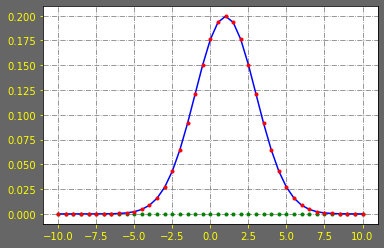

In [5]:
fc=np.array([1,1,1])*0.4
fig, ax=plt.subplots(1,1)
fig.set_facecolor(fc)
ax.plot(x,x*0,'g.')
ax.plot(x,p,'b')
ax.plot(x,p,'r.')
ax.grid(color='gray',linestyle='-.')
ax.tick_params(colors='yellow')
plt.show()

**Problem 1**

a)

In [6]:
x1 = np.arange(-10, 10.5, 0.5).reshape(-1, 1)
x2 = np.arange(-9, 10.5, 0.5).reshape(-1, 1)
X1, X2 = np.meshgrid(x1, x2)

In [7]:
mu = np.array([1, 1]) 
sigma = np.array([[5, 3], [3, 5]])

b)

In [8]:
p = norm2D(mu, sigma, X1, X2)

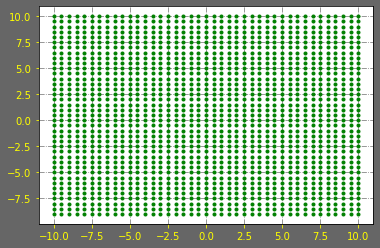

In [9]:
fc = np.array([1, 1, 1]) * 0.4
fig2, ax2 = plt.subplots(1, 1)
fig2.set_facecolor(fc)
ax2.plot(X1, X2, 'g.')
ax2.grid(color='gray', linestyle = '-.')
ax2.tick_params(colors = 'yellow')

plt.show()

c)

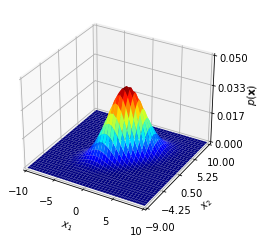

In [10]:
plt.clf()
fig = plt.figure(1)
fig.set_facecolor('w')
ax = fig.gca(projection='3d')
obj = ax.plot_surface(X1, X2, p, cmap=plt.cm.get_cmap('jet'))
zm = np.around(1.2*p.max(), decimals=2)
xt = (np.linspace(x1[0, 0], x1[-1, 0], 5))
yt = (np.linspace(x2[0, 0], x2[-1, 0], 5))
zt = (np.linspace(0, zm, 4))
zt = np.around(zt, decimals=3)
ax.set(xticks=xt, yticks=yt, zticks=zt)
ax.set(xlim=(-10, 10), ylim=(-9, 10), zlim=(0, 0.05))
ax.set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$p(\mathbf{x})$')
obj.set(cmap=plt.cm.get_cmap('jet'))
plt.show()

## `norm2D` function from *pdffuns.py*

d)

In [11]:
def norm2D(mu, sigma, X1, X2):
    p = np.zeros(np.shape(X1))
    dim1, dim2 = np.shape(X1)

    const = (2*np.pi)**(-len(mu)/2) * (np.linalg.det(sigma))**(-1/2)

    for i in np.arange(0, dim1):
        for j in np.arange(0, dim2):
            x_mu = ([X1[i, j], X2[i, j]] - mu)
            p[i, j] = const * \
                np.exp(-1/2 * np.linalg.multi_dot([
                    x_mu.T,
                    np.linalg.inv(sigma),
                    x_mu
                ]))

    return p